In [402]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.cross_decomposition import PLSRegression

from sklearn import tree



In [403]:
## import data
## names: column names in the original dataset. names2: recoded column names
## to explicitly present feature meanings in the context.
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
names2 = ['age','sex','chest_pain','resting_blood_pressure','serum_cholesterol','fasting_blood_sugar','restecg','max_heart_rate_achieved','exercise_induced_angina','ST_depression_induced_by_exercise','Peak_exercise_ST_segment','vessels_coloured_by_fluoroscopy','thalassemia_blood_disorder','num']
data = pd.read_csv('processed.cleveland.data', delimiter=",",header=None,names=names)
print('Dimensions of the dataset:',data.shape)

Dimensions of the dataset: (303, 14)


In [404]:
## encode presense of heart disease as 1 and absence as 0
data['presence']= (data['num']>0).astype(int)
print('Data labels distribution:')
data['presence'].value_counts()/data.shape[0]

Data labels distribution:


0    0.541254
1    0.458746
Name: presence, dtype: float64

In [405]:
## Data pre-procession
## 1. replacing missing value with average value of the column
df = data.replace('?', np.nan)
X = df[df.columns[:-2]].to_numpy()

imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit(X)
X=imp_mean.transform(X)

X_unscale = X


## Normalization on all features
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## target column 
y = df[df.columns[-1]].to_numpy()

In [407]:
df_clean = pd.DataFrame(X_unscale,columns=names2[:-1])
df_clean

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,Peak_exercise_ST_segment,vessels_coloured_by_fluoroscopy,thalassemia_blood_disorder
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0


Dataframe dimensions: (303, 13)


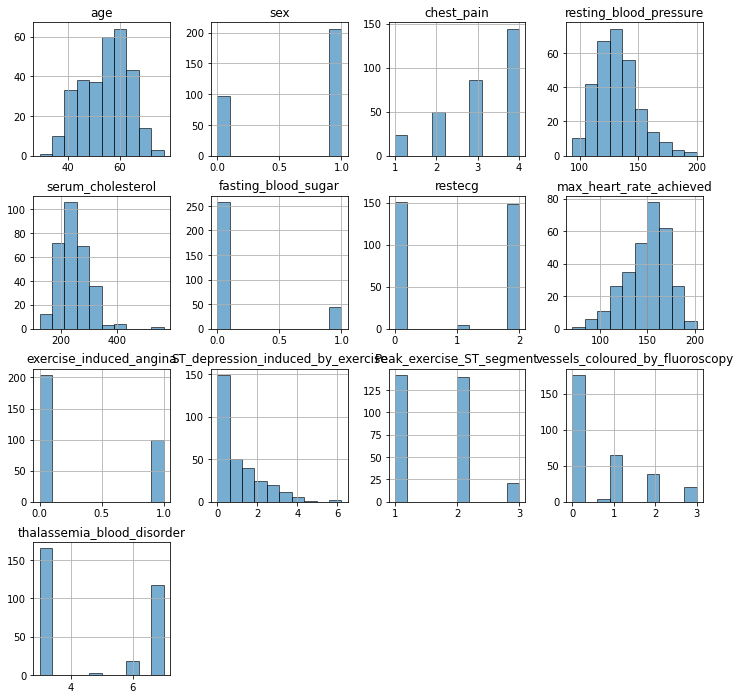

In [408]:
## Data distribution for each feature of the dataset.

print('Dataframe dimensions:',df_clean.shape)
df_clean.hist(bins=10,figsize=(12,12),alpha=0.6,edgecolor="k")
plt.show()

## PCA Analysis

In [409]:
## PCA visualization of the high dimensional data
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

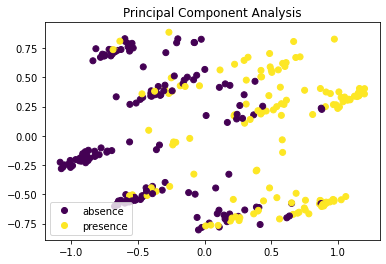

In [410]:
scatter = plt.scatter(x=X_pca[:,0],y=X_pca[:,1],c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=['absence','presence'],loc = 'lower left')
plt.title("Principal Component Analysis")
plt.show()

In [411]:
print('The explained variance of the first two Principal Components:',pca.explained_variance_ratio_)

The explained variance of the first two Principal Components: [0.27509522 0.17147887]


Text(0, 0.5, 'Principal components')

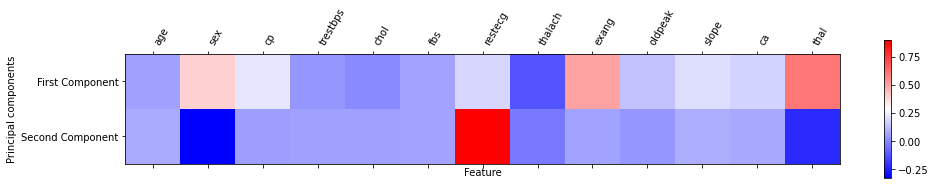

In [412]:
plt.matshow(pca.components_,cmap='bwr')
plt.yticks([0,1],['First Component','Second Component'])
plt.colorbar()
plt.xticks(range(13),names[:13],rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Train and test data split

In [475]:
## Split dataset to training and test set (0.8,0.2), stratify the split to ensure
## the same representation of each label in both training and test sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state=0)

## PLS-DA (Partial Least Square - Discriminant Analysis)

In [414]:
## convert target values to two columns utilizing one-hot encoding.
y_dummy = np.column_stack((y_train,1-y_train))

## train a PLSRegression model
myplsda=PLSRegression().fit(X_train,y_dummy)

## predicted values have two columns, the first column is the possibility of label=1
## the second column is the possibility of label = 0 
y_pred_plsda = myplsda.predict(X_test)

## convert possibilites back to predicted label values
y_pred = []
for i in range(y_pred_plsda.shape[0]):
    if y_pred_plsda[i][0] > y_pred_plsda[i][1]:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred = np.array(y_pred)

In [415]:
## Model evaluation
## accuracy score of PLS-DA algorithm.
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8289473684210527
[[34  7]
 [ 6 29]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.81      0.83      0.82        35

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [416]:
## Sorting the features according to the absolute values of the coefficients
## some features with trivial coefficients <0.01, e.g. age, fasting_blood_sugar
print('Feature Coefficients in PLS-DA Classifier:')
pd.DataFrame(myplsda.coef_[:,0],index=names2[:-1],columns = ['Coefficients']).sort_values(by='Coefficients',key=lambda col: abs(col),ascending= False)

Feature Coefficients in PLS-DA Classifier:


,Coefficients
vessels_coloured_by_fluoroscopy,0.123161
thalassemia_blood_disorder,0.122823
sex,0.091530
chest_pain,0.088305
exercise_induced_angina,0.063910
max_heart_rate_achieved,-0.046581
restecg,0.037579
ST_depression_induced_by_exercise,0.024533
fasting_blood_sugar,-0.015531
Peak_exercise_ST_segment,0.014569


### Logistic Regression ### 

In [417]:
kfold = StratifiedKFold(n_splits=10,shuffle=True)

In [418]:
## In logistic regression, we could tune hyperparameter C to apply regularizaiton.
## Lower value of C will enforce coeffients close to 0, which usually decrease
## the performance on training data, but might improve the generalization on 
## testing data. Through enforcing coefficients close to 0, we can also identify 
## those significantly correlated features.

## Grid search with cross validation for parameter C

param_grid = {'C': [1, 0.5, 0.1, 0.01, 0.001]}

print("Parameter grid:\n{}".format(param_grid))


grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=10,
return_train_score=True)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))



Parameter grid:
{'C': [1, 0.5, 0.1, 0.01, 0.001]}
Test set score: 0.86
Best parameters: {'C': 0.1}
Best cross-validation score: 0.82
Best estimator:
LogisticRegression(C=0.1, random_state=42)


In [419]:
## Logistic Regression with optimal parameter C = 0.1
lr2 = grid_search.best_estimator_
lr2.fit(X_train,y_train)

sig_factors = {}
log_coeff = []
for i in range(lr3.coef_.shape[1]):
    if abs(lr3.coef_[0][i])>0.1:
        sig_factors[names2[i]]=lr3.coef_[0][i]
        
sorted_factors = sorted(sig_factors.items(),key = lambda x:x[1], reverse = True)
print('All Features with coefficients (absolute value) > 0.1:\n')
for factor in sorted_factors:
    print(factor[0],format(factor[1],'.4f'))

All Features with coefficients (absolute value) > 0.1:

thalassemia_blood_disorder 0.9286
vessels_coloured_by_fluoroscopy 0.7965
chest_pain 0.6194
exercise_induced_angina 0.5934
sex 0.5023
restecg 0.3351
Peak_exercise_ST_segment 0.3346
ST_depression_induced_by_exercise 0.2641
age 0.2116
max_heart_rate_achieved -0.3291


In [420]:
## Performance evaluation
print('Confusion matrix for logisic regression is:\n',confusion_matrix(y_test,lr2.predict(X_test)))
print('\nClassification report for logistic regression:\n',classification_report(y_test,lr2.predict(X_test)))

Confusion matrix for logisic regression is:
 [[36  5]
 [ 6 29]]

Classification report for logistic regression:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.85      0.83      0.84        35

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [421]:
print('Feature Coefficients in Logistic Classifier:')
pd.DataFrame(lr2.coef_[0],index=names2[:-1],columns = ['Coefficients']).sort_values(by='Coefficients',key=lambda col: abs(col),ascending= False)

Feature Coefficients in Logistic Classifier:


,Coefficients
thalassemia_blood_disorder,0.928550
vessels_coloured_by_fluoroscopy,0.796501
chest_pain,0.619409
exercise_induced_angina,0.593353
sex,0.502308
restecg,0.335101
Peak_exercise_ST_segment,0.334574
max_heart_rate_achieved,-0.329078
ST_depression_induced_by_exercise,0.264119
age,0.211639


## Support Vector Machine

In [422]:

C1,C2,C3=0.01,10,1000
kernel1,kernel2,kernel3 = 'linear','rbf','poly'
hyperparams=(C1,kernel1),(C2,kernel1),(C3,kernel1),(C1,kernel2),(C2,kernel2),(C3,kernel2),(C1,kernel3),(C2,kernel3),(C3,kernel3)

for C,kernel in hyperparams:
    svm_clf=SVC(kernel=kernel,C=C)
    scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
    print('Hyperparameter values (gamma,C,kernel):',gamma,C,kernel)
    print(scores.mean())

    


Hyperparameter values (gamma,C,kernel): 1000 0.01 linear
0.7316205533596838
Hyperparameter values (gamma,C,kernel): 1000 10 linear
0.8193675889328063
Hyperparameter values (gamma,C,kernel): 1000 1000 linear
0.8150197628458496
Hyperparameter values (gamma,C,kernel): 1000 0.01 rbf
0.5418972332015809
Hyperparameter values (gamma,C,kernel): 1000 10 rbf
0.8015810276679842
Hyperparameter values (gamma,C,kernel): 1000 1000 rbf
0.7845849802371541
Hyperparameter values (gamma,C,kernel): 1000 0.01 poly
0.8239130434782608
Hyperparameter values (gamma,C,kernel): 1000 10 poly
0.766600790513834
Hyperparameter values (gamma,C,kernel): 1000 1000 poly
0.7446640316205533


In [423]:
## Grid search with cross validation for parameter C
from sklearn.svm import SVC

param_grid = {'C': [1000, 1, 0.01],
             'gamma':[0.1,5],
             'kernel':['linear','rbf']}

print("Parameter grid:\n{}".format(param_grid))


grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=10,
return_train_score=True)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))



Parameter grid:
{'C': [1000, 1, 0.01], 'gamma': [0.1, 5], 'kernel': ['linear', 'rbf']}
Test set score: 0.80
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.83
Best estimator:
SVC(C=1, gamma=0.1, random_state=42)


In [424]:
mysvc = grid_search.best_estimator_
mysvc.fit(X_train,y_train)
y_pred_svc = mysvc.predict(X_test)

In [425]:
## Performance evaluation
print('Confusion matrix for logisic regression is:\n',confusion_matrix(y_test,mysvc.predict(X_test)))
print('\nClassification report for logistic regression:\n',classification_report(y_test,mysvc.predict(X_test)))

Confusion matrix for logisic regression is:
 [[33  8]
 [ 7 28]]

Classification report for logistic regression:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.78      0.80      0.79        35

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



### Naive Bayes

In [426]:
nb = GaussianNB()
scores = cross_val_score(nb,X_train, y_train, cv=kfold)
print(scores,scores.mean())

[0.86956522 0.95652174 0.7826087  0.86956522 0.86956522 0.69565217
 0.82608696 0.72727273 0.81818182 0.86363636] 0.8278656126482213


In [427]:
nb.fit(X_test,y_test)
print("Naive Bayes Test Accuracy:",nb.score(X_test,y_test))

Naive Bayes Test Accuracy: 0.9078947368421053


In [428]:
confusion_matrix(y_test,nb.predict(X_test))

array([[38,  3],
       [ 4, 31]])

In [429]:
print(classification_report(y_test,nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.91      0.89      0.90        35

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76




### Decision Tree

In [430]:
## dt0 is a single decision tree with all parameters set to default. The accuracy on test data is 76%
## We set max_depth hyperparameter to prune the decision tree. The test accuracy has been improved from 76% to 81%, which
## indicates that with pruning, the tree generalized better on unseen test data.


## Grid search with cross validation for parameter C

param_grid = {'max_depth': [2, 3, 4, 5, 6]}

print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42,criterion='entropy'), param_grid, cv=10,
return_train_score=True)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Parameter grid:
{'max_depth': [2, 3, 4, 5, 6]}
Test set score: 0.78
Best parameters: {'max_depth': 3}
Best cross-validation score: 0.81
Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


In [432]:
## Construct Decision Tree with optimal parameters 
dt = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=3)
scores = cross_val_score(dt2,X_train, y_train, cv=kfold)
print(scores,scores.mean())

dt.fit(X_train,y_train)
print("Test accuracy is: ",dt.score(X_test,y_test))

[0.86956522 0.73913043 0.65217391 0.91304348 0.7826087  0.7826087
 0.82608696 0.90909091 0.77272727 0.95454545] 0.8201581027667985
Test accuracy is:  0.7763157894736842


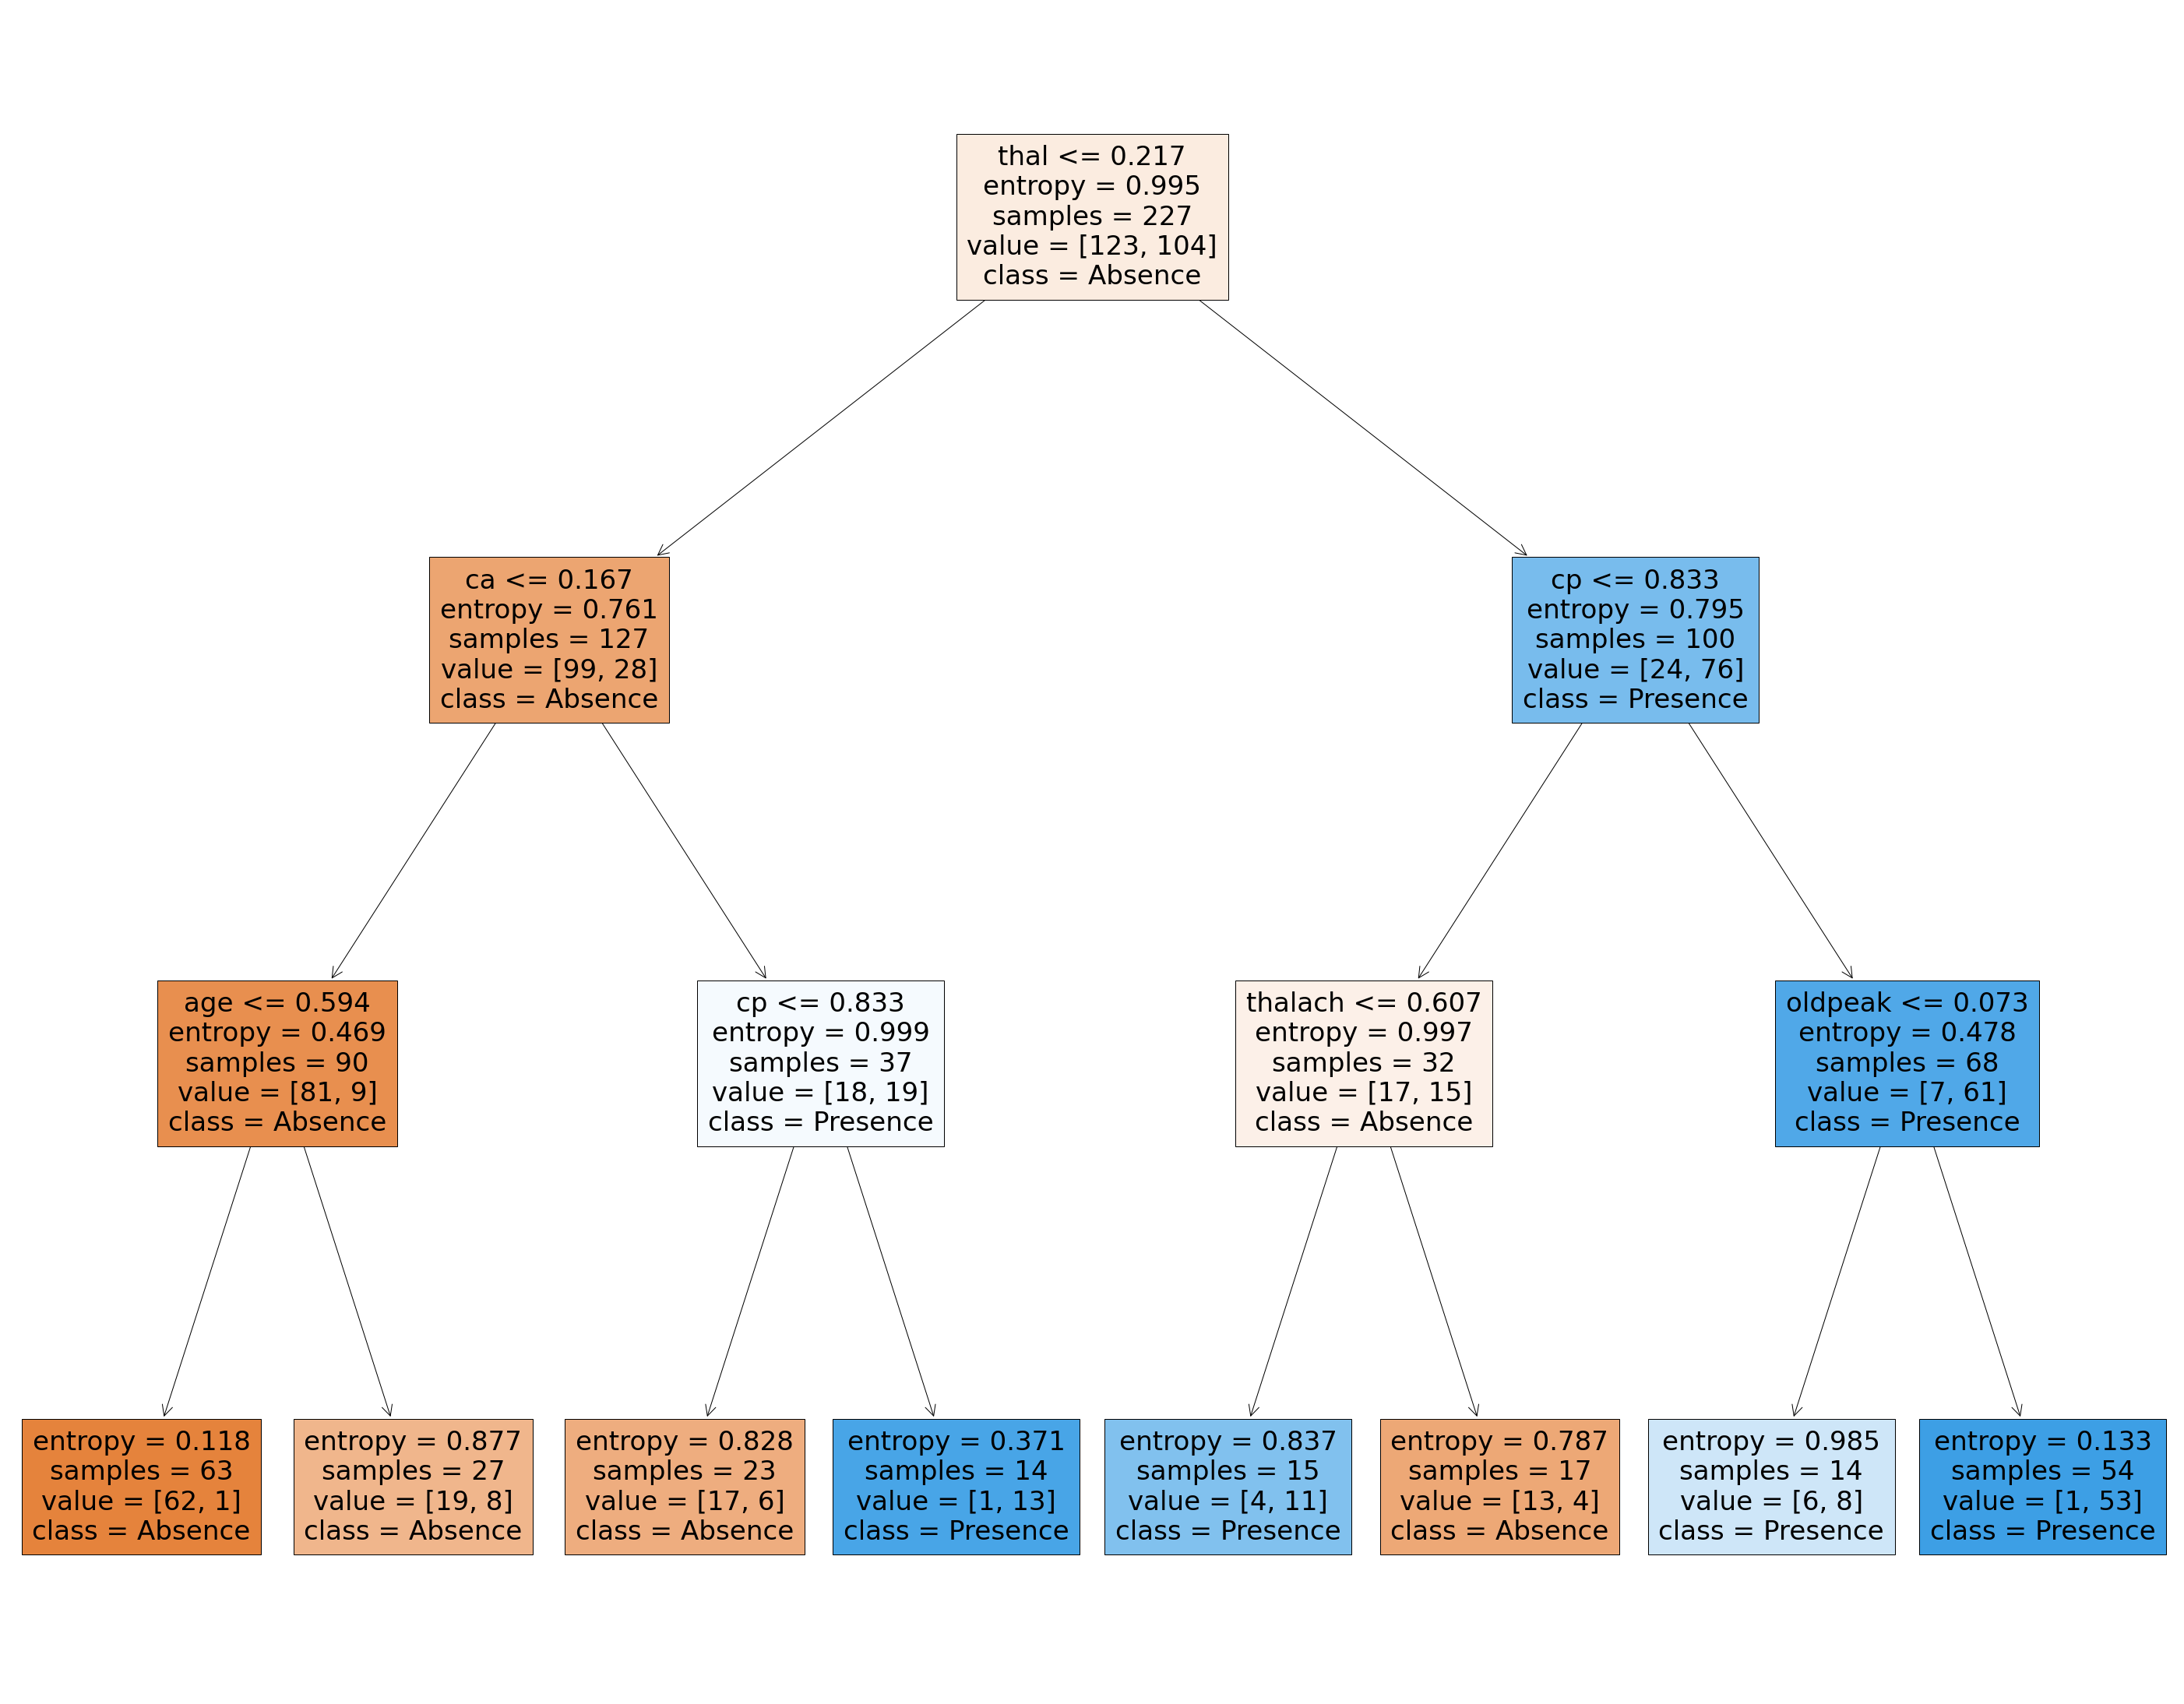

In [433]:

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(dt, 
                   feature_names=names[:-1],  
                   class_names=["Absence","Presence"],
                   filled=True)
plt.savefig('heart_disease_decision_tree.png')

In [437]:
confusion_matrix(y_test,dt.predict(X_test))

array([[32,  9],
       [ 8, 27]])

In [438]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.75      0.77      0.76        35

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



### Ensembles (BaggingClassifer and AdaBoostClassifier)

In [442]:
#bag_clf = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=max_depth,random_state=0),n_estimators=n_estimators,max_samples=max_samples,bootstrap=True,random_state=0)
bag_clf = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',random_state=42),bootstrap=True,random_state=42)

scores = cross_val_score(bag_clf,X,y,cv=kfold)
print(scores,scores.mean())

bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

[0.87096774 0.77419355 0.77419355 0.83333333 0.9        0.73333333
 0.73333333 0.73333333 0.9        0.76666667] 0.8019354838709678


0.7763157894736842

In [443]:
print(classification_report(y_test,bag_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.72      0.83      0.77        35

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



In [444]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier())
ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)

0.75

## Random Forest

In [445]:
## grid search with cross validation for parameters in Random Forest
param_grid = {'n_estimators': [5,10,30,60,100,200,500],
              'max_leaf_nodes': [4,16,50]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0,max_features='sqrt',criterion='entropy'), param_grid, cv=kfold,return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_['n_estimators'])
print(grid_search.best_params_['max_leaf_nodes'])
print("{:.4f}".format(grid_search.best_score_))
print("{:.4f}".format(grid_search.score(X_test, y_test)))

500
4
0.8198
0.8684


In [446]:


rf = RandomForestClassifier(random_state=0,max_features='sqrt',criterion='entropy')
scores = cross_val_score(rf,X_train,y_train,cv=kfold)
print(scores,scores.mean())

rf.fit(X_train,y_train)
print("Random Forest Accuracy on test data:", rf.score(X_test,y_test))

[0.95652174 0.86956522 0.73913043 0.7826087  0.73913043 0.86956522
 0.7826087  0.72727273 0.72727273 1.        ] 0.8193675889328063
Random Forest Accuracy on test data: 0.8421052631578947


In [447]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.81      0.86      0.83        35

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [448]:
print('Feature Importance in Random Forest:')
pd.DataFrame(rf.feature_importances_,index=names2[:-1],columns = ['Feature_Importance']).sort_values(by='Feature_Importance',key=lambda col: abs(col),ascending= False)

Feature Importance in Random Forest:


,Feature_Importance
thalassemia_blood_disorder,0.120385
chest_pain,0.117645
max_heart_rate_achieved,0.117057
vessels_coloured_by_fluoroscopy,0.113002
ST_depression_induced_by_exercise,0.101172
age,0.100359
serum_cholesterol,0.090868
resting_blood_pressure,0.077276
exercise_induced_angina,0.044509
sex,0.040176


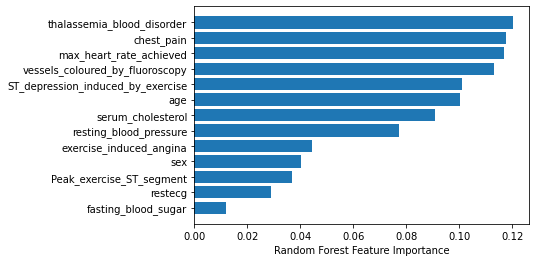

In [449]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(np.array(names2)[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

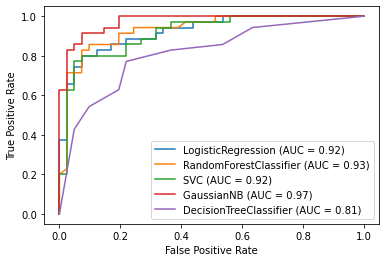

In [450]:
## Plot AUC curve for all models.
from sklearn import metrics

from sklearn.metrics import plot_roc_curve

classifiers = [lr2,rf,mysvc,nb,dt]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

## SHAP Values Investigation for Different Models

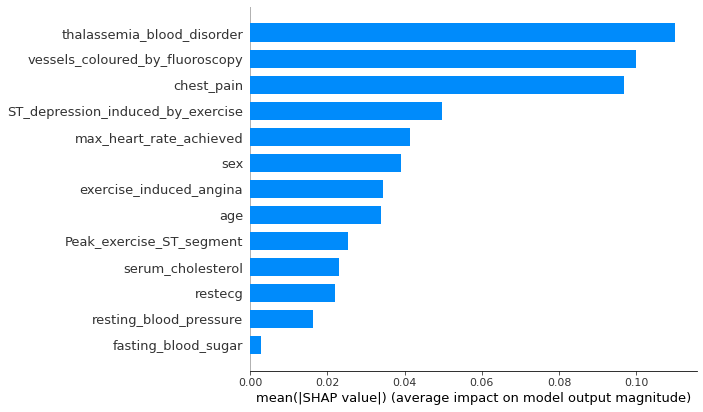

In [453]:
## Mean SHAP values of each feature for class 1
shap_values_g = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values_g[1], X_train, plot_type="bar",feature_names=names2[:-1])




In [476]:
test_df = pd.DataFrame(X_test[10].reshape(1,13),columns=names2[:-1])

In [477]:
test_df

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,Peak_exercise_ST_segment,vessels_coloured_by_fluoroscopy,thalassemia_blood_disorder
0,0.291667,1.0,1.0,0.245283,0.116438,0.0,1.0,0.374046,1.0,0.403226,0.5,0.0,1.0


In [478]:
import shap  # package used to calculate Shap values

## Explore SHAP values for model Random Forest 

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)



# Calculate Shap values
shap_values = explainer.shap_values(X_test[10])

shap_values[1]



array([-0.00468026,  0.02409369,  0.10527183,  0.00119754, -0.0149291 ,
       -0.00166412,  0.01034846,  0.07333822,  0.05610348,  0.11823495,
        0.02353205, -0.06554912,  0.15760989])

In [479]:
## Check the average value for X_train for each variable.

pd.DataFrame(scaler.inverse_transform(X_train.mean(axis=0).reshape(1,13)).reshape(13,1),index = names2[:-1],columns=['X_train_mean'])

,X_train_mean
age,54.607930
sex,0.669604
chest_pain,3.171806
resting_blood_pressure,131.370044
serum_cholesterol,248.418502
fasting_blood_sugar,0.145374
restecg,0.986784
max_heart_rate_achieved,148.845815
exercise_induced_angina,0.321586
ST_depression_induced_by_exercise,1.066520


In [480]:
## Let's check the original values (before normalization) for observation 10 in test set.
pd.DataFrame(scaler.inverse_transform(X_test[10].reshape(1,13)).reshape(13,1),index = names2[:-1],columns=['Observation_10'])




,Observation_10
age,43.0
sex,1.0
chest_pain,4.0
resting_blood_pressure,120.0
serum_cholesterol,177.0
fasting_blood_sugar,0.0
restecg,2.0
max_heart_rate_achieved,120.0
exercise_induced_angina,1.0
ST_depression_induced_by_exercise,2.5


In [481]:
## List SHAP values for X_test[10]
df = pd.DataFrame(shap_values[1], index=names2[:-1],columns = ['SHAP_Value']).sort_values(by='SHAP_Value',ascending=False)

print('Heart disease possibility:', rf.predict_proba(X_test[10].reshape(1,13))[0][1])
print(df)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], test_df)

Heart disease possibility: 0.94
                                   SHAP_Value
thalassemia_blood_disorder           0.157610
ST_depression_induced_by_exercise    0.118235
chest_pain                           0.105272
max_heart_rate_achieved              0.073338
exercise_induced_angina              0.056103
sex                                  0.024094
Peak_exercise_ST_segment             0.023532
restecg                              0.010348
resting_blood_pressure               0.001198
fasting_blood_sugar                 -0.001664
age                                 -0.004680
serum_cholesterol                   -0.014929
vessels_coloured_by_fluoroscopy     -0.065549


## Clustering

Contrast to supervised learning, which train the model with known labels  in unsupervised learning there are no known labels about the dataset. We are trying to explore any potential and interesting structures in the data.

The idea behind the clustering exploration is we try to find any particular common characteristics among data labeld as positive. 

We will try to use k=2 and also explore the percentage of positve cases (purity) in each cluster. We also try other values of k, 3,4,5,6,7,8. There might be more than single one characteristics among positive cases (multiple combinations of risk factors), therefore we hope using other k values to find cluserting which could cluster most of positive cases in one or more clusters.


 Clustering the X data ,excluding lable data, using K-means to identify any particular 
 characteristics/structures in the data.

 Clustering the X data using K-means to identify any particular 
 characteristics among different labels

In [482]:

from sklearn.cluster import KMeans

In [483]:
## define function to return the positive fraction(proportion of positive
## data points in all data points of that cluster) in all clusters.




In [484]:
kmeans_per_k = []
k_values = [2,3,4,5,6,7,8]
for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(X)
    kmeans_per_k.append(kmeans)
    
    
    
    

In [485]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,kmeans_per_k[3].labels_)

array([[33,  8, 32, 40, 51],
       [29, 72, 10,  6, 22],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [486]:
kmeans_per_k[0].cluster_centers_[0].reshape(1,13)

array([[0.56306689, 0.89795918, 0.8276644 , 0.3718393 , 0.27495108,
        0.18367347, 0.54421769, 0.53585709, 0.54421769, 0.24050911,
        0.41156463, 0.32504418, 0.88390173]])

In [487]:
rf.predict_proba(kmeans_per_k[0].cluster_centers_[0].reshape(1,13))





array([[0.15, 0.85]])

In [488]:
rf.feature_importances_

array([0.10035866, 0.04017568, 0.11764529, 0.07727598, 0.09086787,
       0.01194954, 0.02881677, 0.11705731, 0.044509  , 0.10117248,
       0.03678487, 0.11300205, 0.1203845 ])

In [489]:
def positive_fraction(y=[],y_pred=[]):
    positive_frct = []
    clst_labels = np.unique(np.array(y_pred))
    for k in clst_labels:
        positive_num =0
        clst_num = 0
        for i in range(len(y)):
            if y_pred[i] == k:
                clst_num += 1
                if y[i] == 1:
                    positive_num +=1
        positive_frct.append(positive_num/clst_num)
    return positive_frct
            
            

In [490]:
y_list = y.tolist()

for i, model in enumerate(kmeans_per_k):
    pos_frct = []
    y_pred_list = model.labels_.tolist()
    print('KMeans Clustering with K = ',i+2)
    pos_frct = positive_fraction(y_list,y_pred_list)
    for j in range(len(pos_frct)):
        print(j+1,'th cluster positive fraction:',pos_frct[j])

KMeans Clustering with K =  2
1 th cluster positive fraction: 0.7619047619047619
2 th cluster positive fraction: 0.17307692307692307
KMeans Clustering with K =  3
1 th cluster positive fraction: 0.8470588235294118
2 th cluster positive fraction: 0.1724137931034483
3 th cluster positive fraction: 0.3969465648854962
KMeans Clustering with K =  4
1 th cluster positive fraction: 0.9125
2 th cluster positive fraction: 0.4603174603174603
3 th cluster positive fraction: 0.1724137931034483
4 th cluster positive fraction: 0.3013698630136986
KMeans Clustering with K =  5
1 th cluster positive fraction: 0.46774193548387094
2 th cluster positive fraction: 0.9
3 th cluster positive fraction: 0.23809523809523808
4 th cluster positive fraction: 0.13043478260869565
5 th cluster positive fraction: 0.3013698630136986
KMeans Clustering with K =  6
1 th cluster positive fraction: 0.175
2 th cluster positive fraction: 0.7222222222222222
3 th cluster positive fraction: 0.8775510204081632
4 th cluster positi

In [491]:
inertia = [model.inertia_ for model in kmeans_per_k]

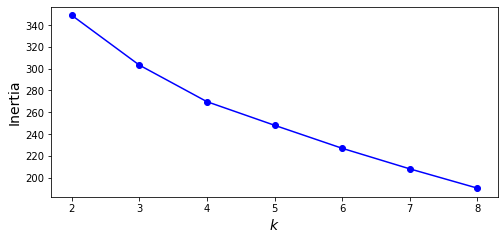

In [492]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 9), inertia, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [493]:
for i,model in enumerate(kmeans_per_k):
    print('KMeans Clustering K = ',i+1,'Confusion Matrix:')
    print(confusion_matrix(y,model.labels_))
    

KMeans Clustering K =  1 Confusion Matrix:
[[ 35 129]
 [112  27]]
KMeans Clustering K =  2 Confusion Matrix:
[[13 72 79]
 [72 15 52]
 [ 0  0  0]]
KMeans Clustering K =  3 Confusion Matrix:
[[ 7 34 72 51]
 [73 29 15 22]
 [ 0  0  0  0]
 [ 0  0  0  0]]
KMeans Clustering K =  4 Confusion Matrix:
[[33  8 32 40 51]
 [29 72 10  6 22]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
KMeans Clustering K =  5 Confusion Matrix:
[[33 10  6 41 52 22]
 [ 7 26 43  7 13 43]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]
KMeans Clustering K =  6 Confusion Matrix:
[[33  4 24 40  6 32 25]
 [ 7 42  9  6 29 10 36]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
KMeans Clustering K =  7 Confusion Matrix:
[[31 16  4 40 25  7  9 32]
 [ 6 16 42  5  8 29 26  7]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [